<a href="https://colab.research.google.com/github/Shivani-Shreyas/Data-Cleansing-with-Python/blob/master/Datacamp_Cleaning_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://cdn.datacamp.com/main-app/assets/brand/datacamp-horizontal-rgb-b641f95b7bdd7560b554c761a0b4910f9619907dd823c0e41244ed72078723bf.svg" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Cleaning Data in Python live training**


Welcome to this live, hands-on training where you will learn how to effectively diagnose and treat missing data in Python.

The majority of data science work often revolves around pre-processing data, and making sure it's ready for analysis. In this session, we will be covering how transform our raw data into accurate insights. In this notebook, you will learn:

* Import data into `pandas`, and use simple functions to diagnose problems in our data.
* Visualize missing and out of range data using `missingno` and `seaborn`.
* Apply a range of data cleaning tasks that will ensure the delivery of accurate insights.

## **The Dataset**

The dataset to be used in this webinar is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far


## **Getting started**

In [0]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Read in the dataset
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

## **Diagnosing data cleaning problems using simple `pandas` and visualizations** 

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column

<br>

- `sns.displot()` plots the distribution of one column in your DataFrame.

In [0]:
# Print the header of the DataFrame
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [0]:
# Print data types of DataFrame
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [0]:
# Print info of DataFrame
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

In [0]:
# Print number of missing values
airbnb.isna()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10016,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10017,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In [0]:
# Print description of DataFrame
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


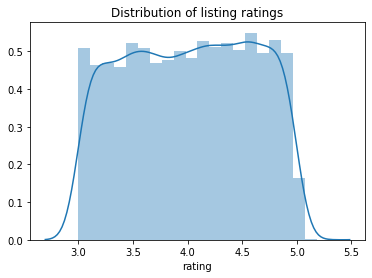

In [0]:
# Visualize the distribution of the rating column


sns.distplot(airbnb['rating'],bins=20)
plt.title("Distribution of listing ratings")
plt.show()

In [0]:
# Find number of unique values in room_type column
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [0]:
# How many values of different room_types do we have?
airbnb['room_type'].value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

## **Our to do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

<br>

_Is that all though?_

- We need to investigate if we duplicates in our data
- We need to make sure that data makes sense by applying some sanity checks on our DataFrame 

## **Q&A**

## **Cleaning data** 

### Data type problems

In [0]:
# Reminder of the DataFrame


##### **Task 1:** Replace `coordinates` with `latitude` and `longitude` columns

To perform this task, we will use the following methods:

- `.str.replace("","")` replaces one string in each row of a column with another
- `.str.split("")` takes in a string and lets you split a column into two based on that string
- `.astype()` lets you convert a column from one type to another

In [0]:
# Remove "(" and ")" from coordinates

airbnb['coordinates']=airbnb['coordinates'].str.replace("(","")
airbnb['coordinates']=airbnb['coordinates'].str.replace(")","")

# Print the header of the column
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [0]:
# Split column into two
lat_long = airbnb['coordinates'].str.split(",", expand=True)
lat_long.head()


,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [0]:
# Assign correct columns to latitude and longitude columns in airbnb
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]
# Print the header and confirm new column creation
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [0]:
# Print out dtypes again
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [0]:
# Convert latitude and longitude to float
airbnb['latitude'] = airbnb['latitude'].astype('float')
airbnb['longitude'] = airbnb['longitude'].astype('float')
# Print dtypes again
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [0]:
# Drop coordinates column
airbnb.drop('coordinates', axis=1, inplace=True)

##### **Task 2:** Remove `$` from `price` and convert it to `float`

To perform this task, we will be using the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [0]:
# Calculate mean of price without conversion

In [0]:
# Remove $ from price before conversion to float
airbnb['price'] =airbnb['price'].str.strip("$")
# Print header to make sure change was done
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [0]:
# Convert price to float

# Calculate mean of price after conversion


In [0]:
# Visualize distribution of prices



##### **Task 3:** Convert `listing_added` and `last_review` columns to `datetime`

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [0]:
# Print header of two columns


In [0]:
# Convert both columns to datetime



In [0]:
# Print header and datatypes of both columns again



### Text and categorical data problems

##### **Task 4:** We need to collapse `room_type` into correct categories

To perform this task, we will be using the following methods:

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [0]:
# Print unique values of `room_type`


In [0]:
# Deal with capitalized values



In [0]:
# Deal with trailing spaces



In [0]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).






# Replace values and collapse data



##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [0]:
# Print header of column


In [0]:
# Split neighbourhood_full



In [0]:
# Create borough and neighbourhood columns


# Print header of columns


In [0]:
# Drop neighbourhood_full column


In [0]:
# Print out unique values of borough and neighbourhood



In [0]:
# Strip white space from neighbourhood column

# Print unique values again


##### **Task 6:** Make sure we set the correct maximum for `rating` column out of range values

In [0]:
# Visualize the rating column again



In [0]:
# Isolate rows of rating > 5.0


In [0]:
# Drop these rows and make sure we have effected changes


In [0]:
# Visualize the rating column again



In [0]:
# Get the maximum


## **Q&A**

### Dealing with missing data

The `missingno` (imported as `msno`) package is great for visualizing missing data - we will be using:

- `msno.matrix()` visualizes a missingness matrix
- `msno.bar()` visualizes a missngness barplot
- `plt.show()` to show the plot

In [0]:
# Visualize the missingness 



In [0]:
# Visualize the missingness on sorted values



In [0]:
# Missingness barplot


**Treating the** `rating`, `number_of_stays`, `5_stars`, `reviews_per_month` **columns**

In [0]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month


In [0]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month


In [0]:
# Impute missing data




# Create is_rated column



**Treating the** `price` **column**

In [0]:
# Investigate DataFrame with missing values in price


In [0]:
# Investigate DataFrame with missing values in price


From a common sense perspective, the most predictive factor for a room's price is the `room_type` column, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:


<p align="center">
<img src="https://github.com/adelnehme/cleaning-data-in-python-live-training/blob/master/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>




In [0]:
# Visualize relationship between price and room_type






In [0]:
# Get median price per room_type


In [0]:
# Impute price based on conditions




In [0]:
# Confirm price has been imputed


### What's still to be done?

Albeit we've done a significant amount of data cleaning tasks, there are still a couple of problems we have yet to diagnose. When cleaning data, we need to consider:

- Values that do not make any sense *(for example: are there values of `last_review` that older than `listing_added`? Are there listings in the future?*)
- Presence of duplicates values - and how to deal with them?

##### **Task 8:** Do we have consistent date data?

In [0]:
# Doing some sanity checks on date data


In [0]:
# Are there reviews in the future?


In [0]:
# Are there listings in the future?


In [0]:
# Drop these rows since they are only 4 rows


In [0]:
# Are there any listings with listing_added > last_review



In [0]:
# Drop these rows since they are only 2 rows


##### **Task 9:** Let's deal with duplicate data


There are two notable types of duplicate data:

- Identical duplicate data across all columns
- Identical duplicate data cross most or some columns

To diagnose, and deal with duplicate data, we will be using the following methods and functions:

- `.duplicated(subset = , keep = )`
  - `subset` lets us pick one or more columns with duplicate values.
  - `keep` returns lets us return all instances of duplicate values.
- `.drop_duplicates(subset = , keep = )`
  

In [0]:
# Print the header of the DataFrame again


In [0]:
# Find duplicates



In [0]:
# Find duplicates


In [0]:
# Remove identical duplicates


In [0]:
# Find non-identical duplicates


In [0]:
# Show all duplicates


To treat identical duplicates across some columns, we will chain the `.groupby()` and `.agg()` methods where we group by the column used to find duplicates (`listing_id`) and aggregate across statistical measures for `price`, `rating` and `list_added`. The `.agg()` method takes in a dictionary with each column's aggregation method - we will use the following aggregations:

- `mean` for `price` and `rating` columns
- `max` for `listing_added` column
- `first` for all remaining column

*A note on dictionary comprehensions:*

Dictionaries are useful data structures in Python with the following format
`my_dictionary = {key: value}` where a `key` is mapped to a `value` and whose `value` can be returned with `my_dictionary[key]` - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:

```
{x: x*2 for x in [1,2,3,4,5]} 
{1:2, 2:4, 3:6, 4:8, 5:10}
```

In [0]:
# Get column names from airbnb



In [0]:
# Create dictionary comprehension with 'first' as value for all columns not being aggregated






In [0]:
# Remove non-identical duplicates


In [0]:
# Make sure no duplication happened


In [0]:
# Print header of DataFrame


## **Q&A**

### Take home question

Try to answer the following questions about the dataset:

- What is the average price of listings by borough? Visualize your results with a bar plot!
- What is the average availability in days of listings by borough? Visualize your results with a bar plot!
- What is the median price per room type in each borough? Visualize your results with a bar plot!
- Visualize the number of listings over time.

**Functions that should/could be used:**
- `.groupby()` and `.agg(})`
- `sns.barplot(x = , y = , hue = , data = )`
- `sns.lineplot(x = , y = , data = )`
- `.dt.strftime()` for extracting specific dates from a `datetime` column

**Bonus points if:**
- You finish more than one question

**Submission details:**
- Share with us a code snippet with your output on LinkedIn, Twitter or Facebook
- Tag us on `@DataCamp` with the hashtag `#datacamplive`
